<a href="https://colab.research.google.com/github/googleinterns/step210-2020/blob/master/nnfl_assn1_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics 
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
def hypothesis(w0,w1,w2,x1,x2):
	h = w0 + w1*x1 + w2*x2
	return h;

In [ ]:
def costfunction(w0,w1,w2,x1,x2,y,m):
	sum = 0
	for i in range(m):
		diff = hypothesis(w0,w1,w2,x1[i],x2[i]) - y[i]
		sum = sum + (diff**2)
	j = sum / (2*m)
	return j;

In [ ]:
def wupdate(w0,w1,w2,x1,x2,y,m,b):
	sum = 0
	for i in range(m):
		loss = hypothesis(w0,w1,w2,x1[i],x2[i])-y[i]
		sum = sum + (loss*b[i])
	sum = sum / m 
	return sum;

In [ ]:
def grad_descent(w0,w1,w2,x1,x2,y,m):
  alpha=0.05
  num_iterations = 500

  train_cost =[] #to plot variation with iteration
  w0_arr = []
  w1_arr = []
  w2_arr = []

  for t in range(num_iterations):
    temp0 = w0 - alpha*wupdate(w0,w1,w2,x1,x2,y,m,np.ones(245))
    temp1 = w1 - alpha*wupdate(w0,w1,w2,x1,x2,y,m,x1)
    temp2 = w2 - alpha*wupdate(w0,w1,w2,x1,x2,y,m,x2)
    w0 = temp0
    w1 = temp1
    w2 = temp2
    w0_arr.append(w0)
    w1_arr.append(w1)
    w2_arr.append(w2)
    cost = costfunction(w0,w1,w2,x1,x2,y,m)
    train_cost.append(cost)

  return(w0_arr,w1_arr,w2_arr,train_cost);

In [ ]:
def plot1(train_cost):
  fig = plt.figure()
  fig.suptitle('Learning Curves', fontsize=20)
  plt.xlabel('Number of Iterations', fontsize=14)
  plt.plot(range(0,500),train_cost, label = 'Training Set Cost')
  plt.legend()

In [ ]:
def plot2(x1,x2,y,m):
  grid_size = 100
  w1 = np.linspace(-2, 2, grid_size)
  w2 = np.linspace(-2, 2, grid_size)

  losses = np.zeros((grid_size, grid_size))
  for i in range(grid_size):
      for j in range(grid_size):
          losses[i][j] = costfunction(0,w1[i],w2[j],x1,x2,y,m)

  ax = plt.axes(projection = '3d')
  W0, W1 = np.meshgrid(w1, w2)
  ax.plot_surface(W0, W1, losses, rstride = 1, cstride = 1,
                  cmap = 'viridis', edgecolor = 'none')

  ax.set_xlabel('w1')
  ax.set_ylabel('w2')
  ax.set_zlabel('Cost')
  plt.title('Cost vs w1, w2')
  plt.show()

final weights 7.264030646833177e-17 0.04305286597239455 0.25898799955070956
MSE without denormalisation: 0.25413701238538483
MSE with denormalisation: 5.337105452078722


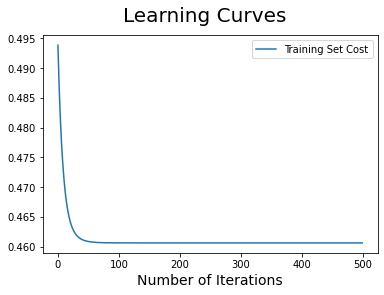

In [ ]:
if __name__ == '__main__':
  #get the information 
  df1 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/training_feature_matrix.xlsx",header=None,sheet_name="Sheet1")
  df2 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/training_output.xlsx",header=None,sheet_name="Sheet1")
  df3 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/test_feature_matrix.xlsx",header=None,sheet_name="Sheet1")
  df4 = pd.read_excel("/content/drive/My Drive/nnfl/nnfl/test_output.xlsx",header=None,sheet_name="Sheet1")

  x1_train = []
  x2_train = []
  y_train = []
  x1_test = []
  x2_test = []
  y_test = []

  num_iterations = 500

  #adding training data 
  for i in range(245):
    x1_train.append(df1[0][i])
    x2_train.append(df1[1][i])
    y_train.append(df2[0][i])

  #adding test data 
  for i in range(104):
    x1_test.append(df3[0][i])
    x2_test.append(df3[0][i])
    y_test.append(df4[0][i])

  #standardising test data :((
  mean_x1 = statistics.mean(x1_train)
  stdev_x1 = statistics.stdev(x1_train)
  x1_train = [(x-mean_x1)/stdev_x1 for x in x1_train]
  x1_test = [(x-mean_x1)/stdev_x1 for x in x1_test]

  mean_x2 = statistics.mean(x2_train)
  stdev_x2 = statistics.stdev(x2_train)
  x2_train = [(x-mean_x2)/stdev_x2 for x in x2_train]
  x2_test = [(x-mean_x2)/stdev_x2 for x in x2_test]

  mean_y = statistics.mean(y_train)
  stdev_y = statistics.stdev(y_train)
  y_train =  [(y-mean_y)/stdev_y for y in y_train]
  y_test = [(y-mean_y)/stdev_y for y in y_test]

  #weights initialised to random float values (but these are kinda close) 
  w0,w1,w2,train_cost = grad_descent(0,0,0,x1_train,x2_train,y_train,245)
  print("final weights",w0[num_iterations-1],w1[num_iterations-1],w2[num_iterations-1])

  mse = 0
  denorm_mse = 0
  for i in range(104):
   error = (w0[num_iterations-1] + w1[num_iterations-1]*x1_test[i] + w2[num_iterations-1]*x2_test[i]) - y_test[i]
   denorm_err = error*stdev_y + mean_y - y_test[i]
   mse = mse + (error ** 2)
   denorm_mse = mse + (denorm_err ** 2)
  mse = mse/104
  denorm_mse = denorm_mse/104
  print("MSE without denormalisation:",mse)
  print("MSE with denormalisation:",denorm_mse)

  plot1(train_cost)


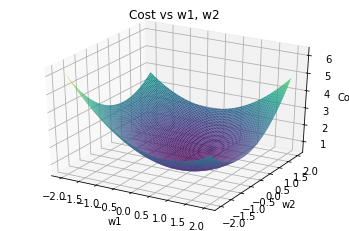

In [ ]:
plot2(x1_train,x2_train,y_train,245)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
